In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    y = np.repeat(np.arange(0,len(classes)),15)
    plt.xlim(-0.5, len(np.unique(y))-0.5)
    plt.ylim(len(np.unique(y))-0.5, -0.5)
    plt.tight_layout()

In [3]:
path = "../data/S1/S1.pkl"


with open(path, "rb") as f:
    data = pickle.load(f, encoding="latin-1")

In [4]:
data.keys()

dict_keys(['rpeaks', 'signal', 'label', 'activity', 'questionnaire', 'subject'])

In [5]:
data["questionnaire"]

{'WEIGHT': 78.0,
 'Gender': ' m',
 'AGE': 34,
 'HEIGHT': 182.0,
 'SKIN': 3,
 'SPORT': 6}

In [6]:
data["subject"]

'S1'

In [7]:
activity = pd.DataFrame(data["activity"]).astype(int)
activity.columns = ["Activity"]
print(activity.shape)
activity.head()

(36848, 1)


,Activity
0,0
1,0
2,0
3,0
4,0


In [8]:
activity["Activity"].value_counts()

6    9420
0    9124
8    4756
5    3556
7    3016
1    2800
4    1648
3    1380
2    1148
Name: Activity, dtype: int64

In [9]:
dic_activity = {1: "Sitting", 2: "Stairs", 3: "Soccer", 4: "Cycling", 5: "Driving", 6: "Lunch", 7: "Walking", 8: "Working"}

In [10]:
label = pd.DataFrame(data["label"])
label

,0
0,49.611369
1,50.323992
2,52.708336
3,55.640794
4,57.658406
...,...
4598,74.058629
4599,80.442006
4600,84.004991
4601,85.796257


In [11]:
label = pd.DataFrame(np.repeat(label.values,8,axis=0))
label.columns = ["Label"]
if(np.size(label, axis = 0) < np.size(activity, axis = 0)):
    mean = label.mean()
    while(np.size(label, axis = 0) < np.size(activity, axis = 0)):
        label = label.append(mean, ignore_index=True)
label

,Label
0,49.611369
1,49.611369
2,49.611369
3,49.611369
4,49.611369
...,...
36843,74.838901
36844,74.838901
36845,74.838901
36846,74.838901


In [12]:
signal = pd.DataFrame(data["signal"])
signal

,chest,wrist
ACC,"[[0.8564000129699707, -0.06779998540878296, -0...","[[-0.765625, -0.078125, 0.671875], [-0.765625,..."
ECG,"[[0.015609741210937498], [0.01812744140625], [...",NaN
EMG,"[[-1.5], [-1.5], [-1.5], [-1.5], [-1.5], [-1.5...",NaN
EDA,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[4.722437], [4.728843], [4.718594], [4.717312..."
Temp,"[[-273.15], [-273.15], [-273.15], [-273.15], [...",NaN
Resp,"[[4.44183349609375], [4.45098876953125], [4.47...",NaN
BVP,NaN,"[[7.28], [6.33], [5.46], [4.6], [3.74], [2.86]..."
TEMP,NaN,"[[32.13], [32.16], [32.16], [32.16], [32.16], ..."


In [17]:
ACC = pd.DataFrame(signal["wrist"].ACC)
# ACC = ACC.iloc[::175, :]
ACC.columns = ["ACC_x", "ACC_y", "ACC_z"]
ACC.reset_index(drop = True, inplace=True)
ACC

,ACC_x,ACC_y,ACC_z
0,-0.765625,-0.078125,0.671875
1,-0.765625,-0.078125,0.656250
2,-0.765625,-0.078125,0.671875
3,-0.765625,-0.078125,0.671875
4,-0.750000,-0.078125,0.671875
...,...,...,...
294779,-0.375000,0.000000,0.937500
294780,-0.375000,0.000000,0.937500
294781,-0.375000,-0.015625,0.937500
294782,-0.390625,0.000000,0.937500


In [16]:
signal['wrist']

ACC     [[-0.765625, -0.078125, 0.671875], [-0.765625,...
ECG                                                   NaN
EMG                                                   NaN
EDA     [[4.722437], [4.728843], [4.718594], [4.717312...
Temp                                                  NaN
Resp                                                  NaN
BVP     [[7.28], [6.33], [5.46], [4.6], [3.74], [2.86]...
TEMP    [[32.13], [32.16], [32.16], [32.16], [32.16], ...
Name: wrist, dtype: object

In [15]:
ECG = pd.DataFrame(signal["chest"].ECG)
ECG = ECG.iloc[::175, :]
ECG.reset_index(drop = True, inplace=True)
ECG

,0
0,0.015610
1,-0.015747
2,-0.008743
3,-0.339523
4,-0.089905
...,...
36843,-0.091507
36844,-0.159714
36845,0.074890
36846,-0.110779


In [41]:
Resp = pd.DataFrame(signal["chest"].Resp)
Resp = Resp.iloc[::175, :]
Resp.columns = ["Resp"]
Resp.reset_index(drop = True, inplace=True)
Resp

,Resp
0,4.441833
1,4.876709
2,3.340149
3,0.740051
4,-1.475525
...,...
36843,-2.183533
36844,-1.872253
36845,-2.696228
36846,-3.175354


In [42]:
chest = pd.concat([ACC], sort=False)
chest["Resp"] = Resp
chest["ECG"] = ECG
chest.reset_index(drop=True, inplace=True)
chest = chest.add_prefix('chest_')
chest

,chest_ACC_x,chest_ACC_y,chest_ACC_z,chest_Resp,chest_ECG
0,0.8564,-0.0678,-0.3656,4.441833,0.015610
1,0.8514,-0.0654,-0.3688,4.876709,-0.015747
2,0.8514,-0.0662,-0.3708,3.340149,-0.008743
3,0.8594,-0.0632,-0.3640,0.740051,-0.339523
4,0.8510,-0.0674,-0.3694,-1.475525,-0.089905
...,...,...,...,...,...
36843,0.8956,-0.1158,-0.2526,-2.183533,-0.091507
36844,0.8888,-0.1062,-0.2684,-1.872253,-0.159714
36845,0.8802,-0.0966,-0.2938,-2.696228,0.074890
36846,0.8842,-0.0962,-0.2820,-3.175354,-0.110779


In [43]:
ACC = pd.DataFrame(signal["wrist"].ACC)
ACC = ACC.iloc[::8, :]
ACC.columns = ["ACC_x", "ACC_y", "ACC_z"]
ACC.reset_index(drop = True, inplace=True)
ACC

,ACC_x,ACC_y,ACC_z
0,-0.765625,-0.078125,0.671875
1,-0.765625,-0.078125,0.671875
2,-0.765625,-0.078125,0.671875
3,-0.750000,-0.078125,0.671875
4,-0.765625,-0.078125,0.671875
...,...,...,...
36843,-0.375000,-0.015625,0.937500
36844,-0.359375,-0.015625,0.953125
36845,-0.437500,-0.015625,0.906250
36846,-0.390625,-0.015625,0.921875


In [44]:
EDA = pd.DataFrame(signal["wrist"].EDA)
EDA.columns = ["EDA"]
EDA

,EDA
0,4.722437
1,4.728843
2,4.718594
3,4.717312
4,4.713469
...,...
36843,3.199053
36844,3.186241
36845,3.170867
36846,3.159336


In [45]:
BVP = pd.DataFrame(signal["wrist"].BVP)
BVP = BVP.iloc[::16, :]
BVP.columns = ["BVP"]
BVP.reset_index(drop = True, inplace=True)
BVP

,BVP
0,7.28
1,-11.36
2,-51.27
3,5.65
4,34.34
...,...
36843,22.62
36844,116.83
36845,-18.36
36846,-6.64


In [46]:
TEMP = pd.DataFrame(signal["wrist"].TEMP)
TEMP.columns = ["TEMP"]
TEMP

,TEMP
0,32.13
1,32.16
2,32.16
3,32.16
4,32.16
...,...
36843,34.37
36844,34.37
36845,34.37
36846,34.37


In [47]:
wrist = pd.concat([ACC], sort=False)
wrist["BVP"] = BVP
wrist["TEMP"] = TEMP
wrist.reset_index(drop = True, inplace=True)
wrist = wrist.add_prefix('wrist_')
wrist

,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,wrist_BVP,wrist_TEMP
0,-0.765625,-0.078125,0.671875,7.28,32.13
1,-0.765625,-0.078125,0.671875,-11.36,32.16
2,-0.765625,-0.078125,0.671875,-51.27,32.16
3,-0.750000,-0.078125,0.671875,5.65,32.16
4,-0.765625,-0.078125,0.671875,34.34,32.16
...,...,...,...,...,...
36843,-0.375000,-0.015625,0.937500,22.62,34.37
36844,-0.359375,-0.015625,0.953125,116.83,34.37
36845,-0.437500,-0.015625,0.906250,-18.36,34.37
36846,-0.390625,-0.015625,0.921875,-6.64,34.37


In [48]:
signals = chest.join(wrist)
signals

,chest_ACC_x,chest_ACC_y,chest_ACC_z,chest_Resp,chest_ECG,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,wrist_BVP,wrist_TEMP
0,0.8564,-0.0678,-0.3656,4.441833,0.015610,-0.765625,-0.078125,0.671875,7.28,32.13
1,0.8514,-0.0654,-0.3688,4.876709,-0.015747,-0.765625,-0.078125,0.671875,-11.36,32.16
2,0.8514,-0.0662,-0.3708,3.340149,-0.008743,-0.765625,-0.078125,0.671875,-51.27,32.16
3,0.8594,-0.0632,-0.3640,0.740051,-0.339523,-0.750000,-0.078125,0.671875,5.65,32.16
4,0.8510,-0.0674,-0.3694,-1.475525,-0.089905,-0.765625,-0.078125,0.671875,34.34,32.16
...,...,...,...,...,...,...,...,...,...,...
36843,0.8956,-0.1158,-0.2526,-2.183533,-0.091507,-0.375000,-0.015625,0.937500,22.62,34.37
36844,0.8888,-0.1062,-0.2684,-1.872253,-0.159714,-0.359375,-0.015625,0.953125,116.83,34.37
36845,0.8802,-0.0966,-0.2938,-2.696228,0.074890,-0.437500,-0.015625,0.906250,-18.36,34.37
36846,0.8842,-0.0962,-0.2820,-3.175354,-0.110779,-0.390625,-0.015625,0.921875,-6.64,34.37


In [49]:
for k,v in data["questionnaire"].items() :
    signals[k] = v
signals

,chest_ACC_x,chest_ACC_y,chest_ACC_z,chest_Resp,chest_ECG,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,wrist_BVP,wrist_TEMP,WEIGHT,Gender,AGE,HEIGHT,SKIN,SPORT
0,0.8564,-0.0678,-0.3656,4.441833,0.015610,-0.765625,-0.078125,0.671875,7.28,32.13,78.0,m,34,182.0,3,6
1,0.8514,-0.0654,-0.3688,4.876709,-0.015747,-0.765625,-0.078125,0.671875,-11.36,32.16,78.0,m,34,182.0,3,6
2,0.8514,-0.0662,-0.3708,3.340149,-0.008743,-0.765625,-0.078125,0.671875,-51.27,32.16,78.0,m,34,182.0,3,6
3,0.8594,-0.0632,-0.3640,0.740051,-0.339523,-0.750000,-0.078125,0.671875,5.65,32.16,78.0,m,34,182.0,3,6
4,0.8510,-0.0674,-0.3694,-1.475525,-0.089905,-0.765625,-0.078125,0.671875,34.34,32.16,78.0,m,34,182.0,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36843,0.8956,-0.1158,-0.2526,-2.183533,-0.091507,-0.375000,-0.015625,0.937500,22.62,34.37,78.0,m,34,182.0,3,6
36844,0.8888,-0.1062,-0.2684,-1.872253,-0.159714,-0.359375,-0.015625,0.953125,116.83,34.37,78.0,m,34,182.0,3,6
36845,0.8802,-0.0966,-0.2938,-2.696228,0.074890,-0.437500,-0.015625,0.906250,-18.36,34.37,78.0,m,34,182.0,3,6
36846,0.8842,-0.0962,-0.2820,-3.175354,-0.110779,-0.390625,-0.015625,0.921875,-6.64,34.37,78.0,m,34,182.0,3,6


KeyError: 'Activity'

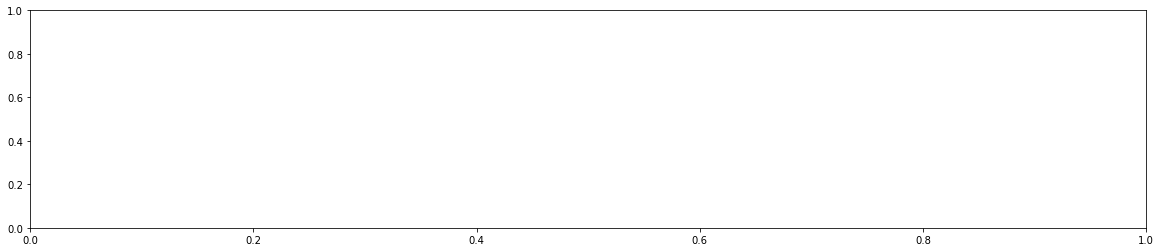

In [50]:
fig, ax = plt.subplots(figsize=(20, 4))
style = dict(size=10, color='k')

i = 0
x_start = 0
x_end = 0
while(i < len(signals.loc[:, 'Activity'])):
    sport_index = signals.loc[i, 'Activity']
    
    if(sport_index != 0):
        
        x_start = i
        while(i < len(signals.loc[:, 'Activity'])):
            if(signals.loc[i, 'Activity'] != sport_index):
                break
            
            else:
                i += 1
            
        x_end = i-1
        sport = dic_activity[sport_index]
        plt.axvspan(xmin=x_start + 60, xmax=x_end, color='#ffb3b3')
        ax.text((x_start+x_end)//2 - 500, 35, sport, **style)
        
        x_start = 0
        x_end = 0
    
    else :
        i += 1

ax.set_ylim(top = 36, bottom = 28)
signals.loc[:, 'wrist_TEMP'].plot(ax=ax)
plt.xlabel("Time", fontsize=15)
plt.ylabel("Temperature", fontsize=15)

KeyError: 'Activity'

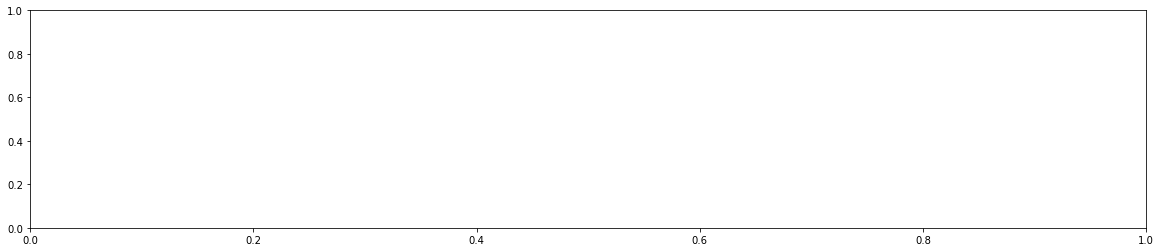

In [51]:
fig, ax = plt.subplots(figsize=(20, 4))
style = dict(size=10, color='k')

i = 0
x_start = 0
x_end = 0
while(i < len(signals.loc[:, 'Activity'])):
    sport_index = signals.loc[i, 'Activity']
    
    if(sport_index != 0):
        
        x_start = i
        while(i < len(signals.loc[:, 'Activity'])):
            if(signals.loc[i, 'Activity'] != sport_index):
                break
            
            else:
                i += 1
            
        x_end = i-1
        sport = dic_activity[sport_index]
        plt.axvspan(xmin=x_start + 60, xmax=x_end, color='#ffb3b3')
        ax.text((x_start+x_end)//2 - 500, 145, sport, **style)
        
        x_start = 0
        x_end = 0
    
    else :
        i += 1


signals.loc[:, 'Label'].plot(ax=ax)
plt.xlabel("Time", fontsize=15)
plt.ylabel("Heartrate", fontsize=15)